# **Clasificadores a priori y a posteriori**
Los **clasificadores a priori** construyen el clasificador en un solo paso, utilizando una muestra
de aprendizaje para el cálculo de las funciones discriminantes y un cálculo exacto.
Los **clasificadores a posteriori** o con aprendizaje se construyen siguiendo un procedimiento
iterativo de entrenamiento, en el cual el clasificador aprende a reconocer de una manera progresiva
los patrones de las muestras de aprendizaje. Para ello suelen utilizar técnicas aproximadas, lo
que implica que el tiempo de aprendizaje puede no ser despreciable

## **Clasificadores supervisados y no supervisados**
Tomando en cuenta la **información que se proporciona** en el proceso de construcción del
clasificador se puede hablar de dos tipos de clasificadores: supervisados o no supervisados.
En los **supervisados**, el supervisor lleva a cabo las etapas en la **construcción** del clasificador:
**determinación de las clases**, **elección** y prueba de las características discriminantes, selección de
la muestra, cálculo de funciones discriminantes y prueba del clasificador.
En los **no supervisados** este proceso se realiza de manera automática, sin la necesidad de
ningún supervisor externo. Para ello se emplean técnicas de agrupamiento, gracias a las cuales
el sistema selecciona y aprende los patrones que poseen características similares, determinándose
automáticamente las clases

## **Clasificadores deterministas y no deterministas**
De acuerdo a la **forma en que se distribuyen los patrones** de la muestra se puede hablar de que
se cumple o no la hipótesis **determinista: cada clase se puede representar por un único vector que
se llama prototipo representante de la clase.** Según esta hipótesis se puede hablar de dos tipos de
clasificadores: clasificadores deterministas y clasificadores no deterministas.
Dependiendo de las características seleccionadas puede ser necesario el uso de uno u otro
tipo. Cuando las características elegidas hacen que los patrones de clases diferentes se sitúen en
**regiones disjuntas, los clasificadores deterministas** darán buenos resultados. Si las regiones **no son
disjuntas** ofrecerán mejores resultados los **clasificadores no deterministas**

# Clasificador determinista euclideano
Es un clasificador **determinístico, supervisado y a priori**. Se basa en el cálculo de un prototipo
o centroide para cada una de las K clases en las que se divide el universo de trabajo

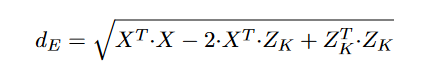


Así, el clasificador euclideano divide el espacio de características en regiones mediante hiper-
planos equidistantes de los centroides

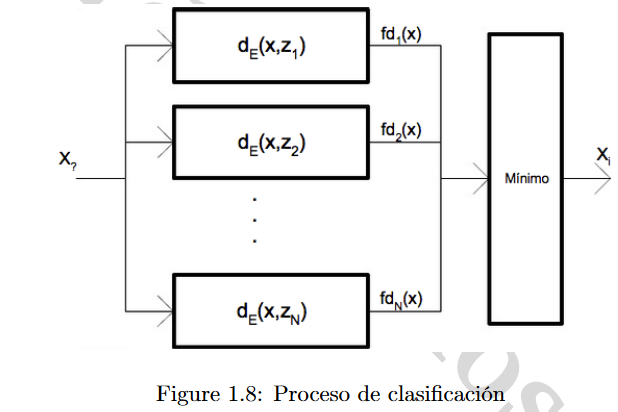

La función discriminante se puede simplificar eliminando la raíz cuadrada, ya que es una
transformación que mantiene la relación de distancia. También se puede eliminar el término
$X^T ·X$ pues es igual para todas las clases. Finalmente suele cambiarse el signo y dividirse entre
2 obteniendo la expresión.


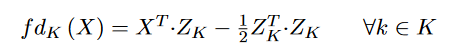

**Ejemplo:** Supóngase que se tienen que distinguir patrones de dos clases, α1 y α2, y que se dispone de
la siguiente muestra:

**Cálculo de Centroides y Funciones Discriminantes**

**Clases**


$\omega_1 = \left\{ \begin{pmatrix} 1 \\ 5 \\ 6 \\ 1 \end{pmatrix}, \begin{pmatrix} 2 \\ 3 \\ 4 \\ -2 \end{pmatrix}, \begin{pmatrix} 0 \\ 1 \\ 5 \\ 3 \end{pmatrix},\begin{pmatrix} 1 \\ 3 \\ 5 \\ 2 \end{pmatrix} \right\} \quad y \quad \omega_2 = \left\{ \begin{pmatrix} 6 \\ 8 \\ -1 \\ 6 \end{pmatrix}, \begin{pmatrix} 7 \\ 9 \\ 3 \\ 6 \end{pmatrix}, \begin{pmatrix} 8 \\ 7 \\ 1 \\ 9 \end{pmatrix} \right\}$

El primer paso consiste en calcular los centroides de las dos clases:

Se calculan sacando el promedio de cada una de las componentes de $\omega$, por ejemplo, para $\omega_1$, la primer componente de $z_1 = (1+2+0+1)/4=4/4=1$




$z_1 = \begin{pmatrix} 1 \\ 3 \\ 5 \\ 1 \end{pmatrix} \quad y \quad z_2 = \begin{pmatrix} 7 \\ 8 \\ 1 \\ 7 \end{pmatrix}$

Posteriormente se calculan las funciones discriminantes:

$fd_1 = X^T \cdot \begin{pmatrix} 1 \\ 3 \\ 5 \\ 1 \end{pmatrix} - \frac{1}{2} \cdot \begin{pmatrix} 1 \\ 3 \\ 5 \\ 1 \end{pmatrix}^T \cdot \begin{pmatrix} 1 \\ 3 \\ 5 \\ 1 \end{pmatrix}$

$fd_2 = X^T \cdot \begin{pmatrix} 7 \\ 8 \\ 1 \\ 7 \end{pmatrix} - \frac{1}{2} \cdot \begin{pmatrix} 7 \\ 8 \\ 1 \\ 7 \end{pmatrix}^T \cdot \begin{pmatrix} 7 \\ 8 \\ 1 \\ 7 \end{pmatrix}$



In [1]:
import numpy as np
from sympy import Matrix, symbols, simplify # Importa herramientas para cálculo simbólico

def clasif_e(samples):
    '''
    Clasificador determinista euclideano
    Este programa calcula un conjunto de funciones de decisión para clasificar
    muestras utilizando un clasificador basado en la distancia euclidiana.
    
    Parámetros:
    - samples: lista de matrices, cada una representando las muestras de una clase.
    
    Retorno:
    - fds: lista de expresiones simbólicas que representan las funciones de decisión.
    '''
    # Número de conjuntos de muestras (número de clases)
    n_samples = len(samples)
    
    # Crear un vector genérico simbólico usando sympy
    # Cada 'x1', 'x2', ..., representa una variable del espacio de características.
    X = Matrix(['x'+str(i+1) for i in range(samples[0].shape[0])])
    
    # Lista para almacenar las funciones de decisión
    fds = []
    
    # Iterar sobre cada conjunto de muestras (cada clase)
    for s in samples:
        # Calcular el vector de medias (promedio) de las muestras de la clase
        m = Matrix(np.mean(s, axis=1))
        
        # Crear la función de decisión para la clase
        # X.T * m representa el producto punto entre el vector simbólico y el vector de medias
        # (m.T * m) / 2 se usa para simplificar la distancia euclidiana
        fd = simplify(X.T * m - (m.T * m) / 2)
        
        # Añadir la función de decisión a la lista
        fds.append(fd)
    
    # Retornar la lista de funciones de decisión
    return fds


In [2]:
w1=np.array([[1,5,6,1],[2,3,4,-2],[0,1,5,3],[1,3,5,2]]).T
w2=np.array([[6,8,-1,6],[7,9,3,6],[8,7,1,9]]).T
samples=(w1,w2)
fds=clasif_e(samples)
print(fds)

for fd in range(len(fds)):
  print(f'{fd} {fd+1}: {fds[fd].evalf(subs={"x1":3,"x2":1,"x3":3,"x4":1})}')


[Matrix([[1.0*x1 + 3.0*x2 + 5.0*x3 + 1.0*x4 - 18.0]]), Matrix([[7.0*x1 + 8.0*x2 + 1.0*x3 + 7.0*x4 - 81.5]])]
0 1: Matrix([[4.00000000000000]])
1 2: Matrix([[-42.5000000000000]])


Dado que 4.0 es mayor que -42.5, el clasificador determinaría que la muestra desconocida pertenece a la clase w1.

# Clasificador probabilista con distancia de Mahalanobis

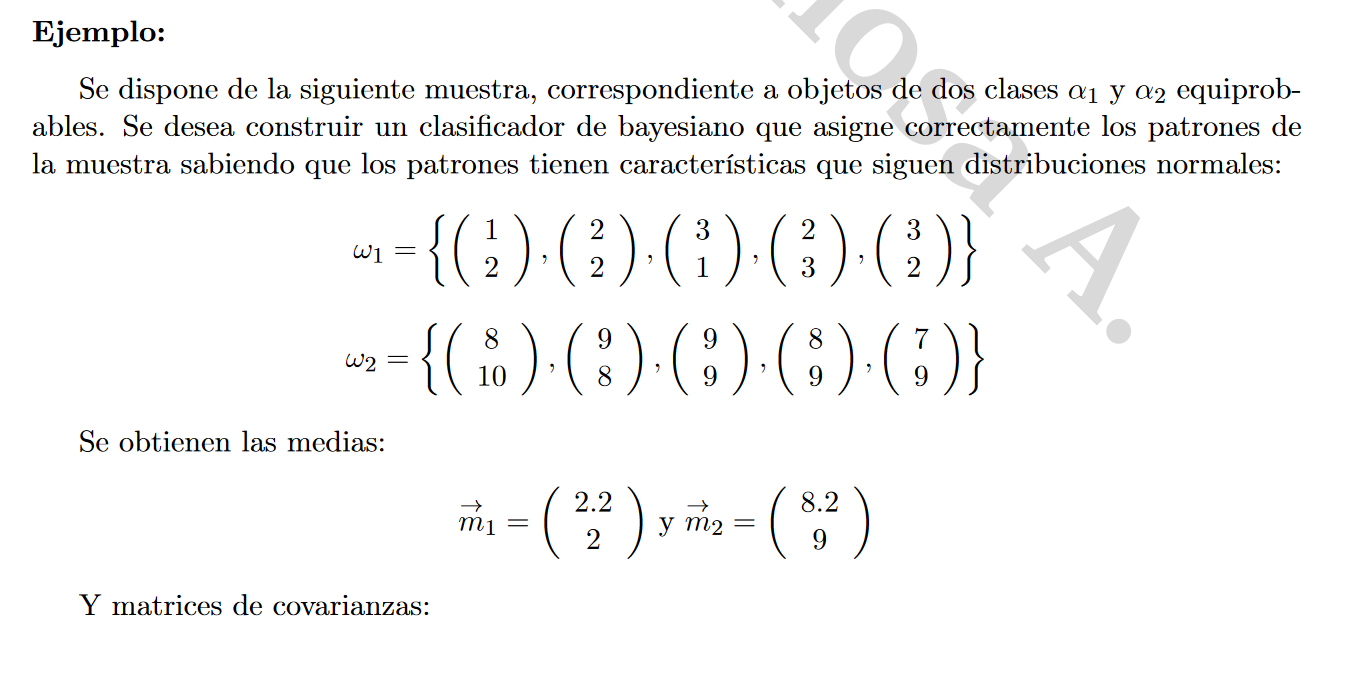


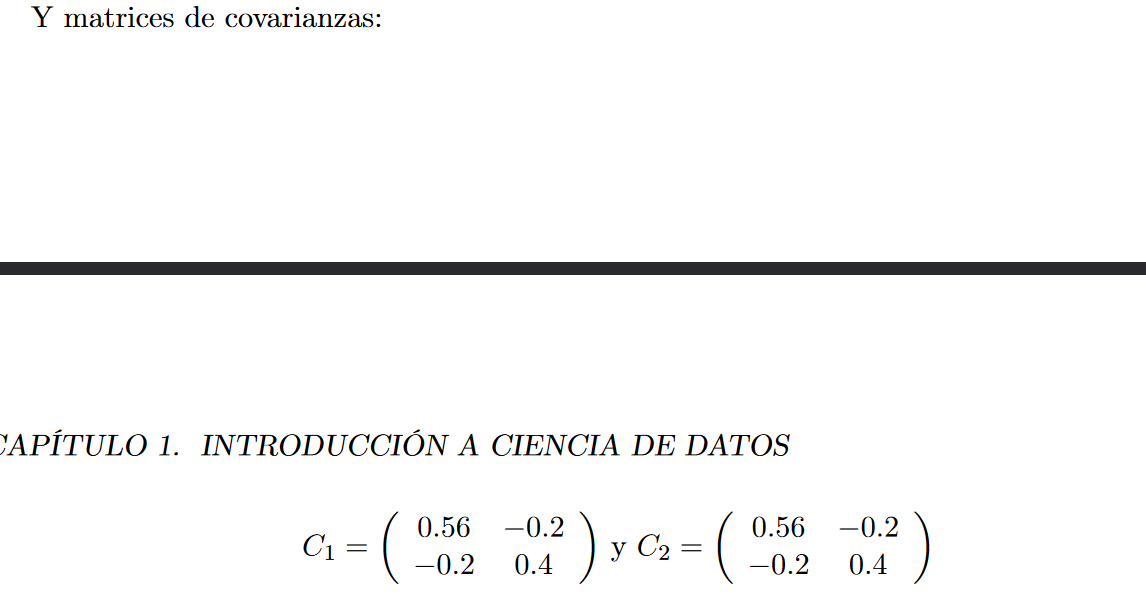

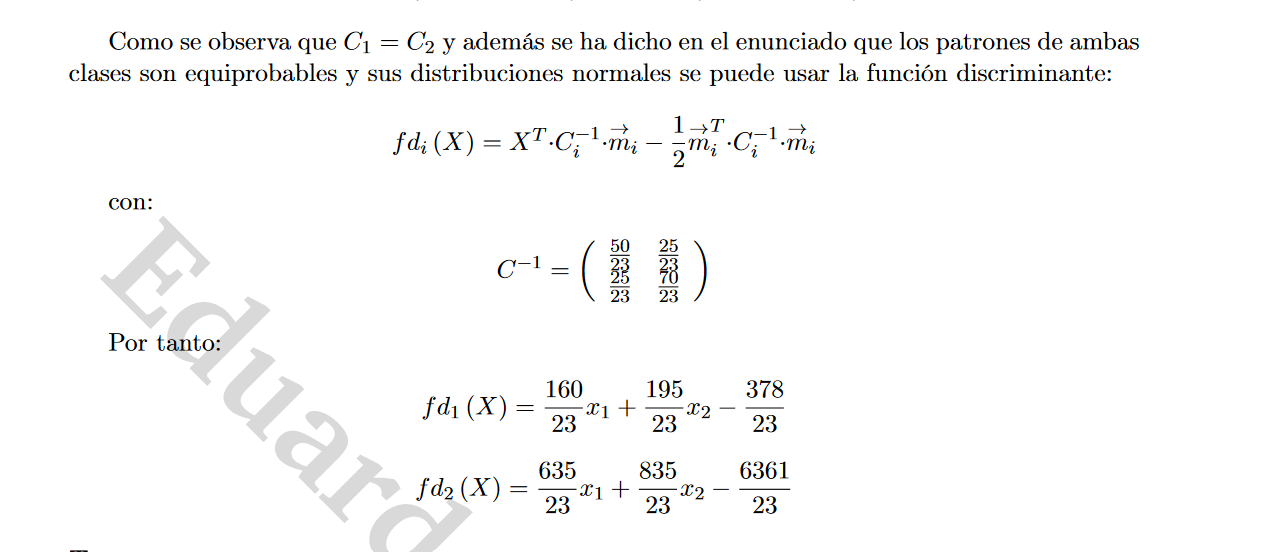

In [3]:
import numpy as np
from sympy import Matrix, symbols, log, simplify

def clasif_m(samples):
    '''
    Clasificador probabilista con distancia de Mahalanobis
    Este programa calcula un conjunto de funciones de decisión para clasificar
    muestras utilizando la distancia de Mahalanobis, la cual considera la varianza y la correlación
    de las características.
    
    Parámetros:
    - samples: lista de matrices, cada una representando las muestras de una clase.
    
    Retorno:
    - fds: lista de expresiones simbólicas que representan las funciones de decisión.
    '''
    # Número de conjuntos de muestras (número de clases)
    n_samples = len(samples)
    
    # Crear un vector genérico simbólico usando sympy
    # Cada 'x1', 'x2', ..., representa una variable del espacio de características.
    X = Matrix([symbols('x'+str(i+1)) for i in range(samples[0].shape[0])])
    
    # Lista para almacenar las funciones de decisión
    fds = []
    
    # Iterar sobre cada conjunto de muestras (cada clase)
    for s in samples:
        # Calcular el vector de medias (promedio) de las muestras de la clase
        m = Matrix(np.mean(s, axis=1))
        
        # Calcular la matriz de covarianza
        m_cov = np.cov(s, bias=True)
        
        # Calcular la inversa de la matriz de covarianza
        m_ci = Matrix(m_cov).inv()
        
        # Imprimir información para depuración
        print(f'Media:\n {m} \n Covarianza:\n {m_cov}\n Inversa:\n {m_ci}')
        
        # Crear la función de decisión para la clase usando la distancia de Mahalanobis
        # (X.T * m_ci * X) / -2 calcula la forma cuadrática generalizada para la distancia
        # X.T * m_ci * m compara el vector genérico con la media
        # (m.T * m_ci * m) / 2 es una constante que permite comparar distancias relativas
        # Se resta log(m_ci.det()/2) para tener en cuenta el determinante de la covarianza en el modelo probabilístico
        fd = simplify((X.T * m_ci * X) / -2 + X.T * m_ci * m - (m.T * m_ci * m) / 2 - Matrix([log(m_ci.det() / 2)]))
        
        # Añadir la función de decisión a la lista
        fds.append(fd)
    
    # Retornar la lista de funciones de decisión
    return fds



In [4]:
w1 =np.array([[1,2],[2,2],[3,1],[2,3],[3,2]]).T
w2 = np.array([[8,10],[9,8],[9,9],[8,9],[7,9]]).T
samples=(w1,w2)
clasif_m(samples)


Media:
 Matrix([[2.20000000000000], [2.00000000000000]]) 
 Covarianza:
 [[ 0.56 -0.2 ]
 [-0.2   0.4 ]]
 Inversa:
 Matrix([[2.17391304347826, 1.08695652173913], [1.08695652173913, 3.04347826086957]])
Media:
 Matrix([[8.20000000000000], [9.00000000000000]]) 
 Covarianza:
 [[ 0.56 -0.2 ]
 [-0.2   0.4 ]]
 Inversa:
 Matrix([[2.17391304347826, 1.08695652173913], [1.08695652173913, 3.04347826086957]])


[Matrix([[-1.08695652173913*x1**2 - 1.08695652173913*x1*x2 + 6.95652173913044*x1 - 1.52173913043478*x2**2 + 8.47826086956522*x2 - 17.1301071234219]]),
 Matrix([[-1.08695652173913*x1**2 - 1.08695652173913*x1*x2 + 27.6086956521739*x1 - 1.52173913043478*x2**2 + 36.304347826087*x2 - 277.564889732118]])]

In [5]:
w1 =np.array([[0.5,10.5],[1,1.25],[3,10.5],[3,12.5],[3,14.5],[3,18],[5,18],[5,16],[5,14.5],[5,13]]).T
w2 = np.array([[6,9],[8,10],[9,11],[8.5,12],[7, 13.5],[8, 16]]).T
samples=(w1,w2)
fds=clasif_m(samples)
print(fds)

for fd in range(len(fds)):
  print(f'{fd} {fd+1}: {fds[fd].evalf(subs={"x1":3,"x2":1,"x3":3,"x4":1})}')

Media:
 Matrix([[3.35000000000000], [12.8750000000000]]) 
 Covarianza:
 [[ 2.5025    4.91875 ]
 [ 4.91875  21.415625]]
 Inversa:
 Matrix([[0.728459785363198, -0.167312958144123], [-0.167312958144123, 0.0851233906491827]])
Media:
 Matrix([[7.75000000000000], [11.9166666666667]]) 
 Covarianza:
 [[0.97916667 0.5625    ]
 [0.5625     5.36805556]]
 Inversa:
 Matrix([[1.08669165885661, -0.113870665417057], [-0.113870665417057, 0.198219306466729]])
[Matrix([[-0.364229892681599*x1**2 + 0.167312958144123*x1*x2 + 0.286185944861133*x1 - 0.0425616953245914*x2**2 + 0.535465244825416*x2 + 0.14767186198882]]), Matrix([[-0.543345829428304*x1**2 + 0.113870665417057*x1*x2 + 7.06490159325211*x1 - 0.0991096532333646*x2**2 + 1.47961574507966*x2 - 33.9020624641074]])]
0 1: Matrix([[-1.27699691362898]])
1 2: Matrix([[-15.8753520611083]])
